In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
wellsfargo = pd.read_excel("/content/final.xlsx")
#wellsfargo_test = pd.read_excel('/content/wellsfargo_test.xlsx')

In [ ]:
print(wellsfargo.shape) # get record and variable counts
print(wellsfargo.columns) # get variable names

(13491, 39)
Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'PWD_UPDT_TS', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'CUST_ZIP', 'CUST_STATE', 'PH_NUM_UPDT_TS',
       'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT', 'FRAUD_NONFRAUD', 'pwd_up_numeric',
       'ph_num_up_numeric', 'cst_since_numeric', 'Tran_TS_Numeric',
       'cst_diff_tran', 'phn_diff_tran', 'pwd_diff_tran',
       'Carrier_Popular Carrier', 'Carrier_Unknown Carrier', 'Device_MOBILE',
       'Device_NoDevice', 'Device_PHONE', 'Device_TABLET', 'auth_prim_AFA_PL',
       'auth_prim_FACE_ID', 'auth_prim_TOUCH_ID', 'auth_prim_UN_PWD',
       'auth_sec_CHALLENGE_ISSUED', 'auth_sec_CHALLENGE_SUCCESS'],
      dtype='object')


In [ ]:
#print(wellsfargo_test.shape) # get record and variable counts
#print(wellsfargo_test.columns)

In [ ]:
wellsfargo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   TRAN_AMT                    13491 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL     13491 non-null  float64       
 2   CUST_AGE                    13491 non-null  int64         
 3   OPEN_ACCT_CT                13491 non-null  int64         
 4   WF_dvc_age                  13491 non-null  int64         
 5   PWD_UPDT_TS                 13491 non-null  datetime64[ns]
 6   RGN_NAME                    11077 non-null  object        
 7   STATE_PRVNC_TXT             11077 non-null  object        
 8   ALERT_TRGR_CD               13491 non-null  int64         
 9   CUST_ZIP                    13491 non-null  int64         
 10  CUST_STATE                  13455 non-null  object        
 11  PH_NUM_UPDT_TS              13491 non-null  datetime64

In [ ]:
for i in range(len(wellsfargo['FRAUD_NONFRAUD'])):
  if wellsfargo.iloc[i,19] == 'Non-Fraud':
     wellsfargo.iloc[i,19] = 0 
  else:
     wellsfargo.iloc[i,19] = 1

In [ ]:
#from pandas.core.dtypes.dtypes import CategoricalDtype
wellsfargo['FRAUD_NONFRAUD']= pd.Categorical(wellsfargo.FRAUD_NONFRAUD)

In [ ]:
wellsfargo.Device_MOBILE =  pd.Categorical(wellsfargo.Device_MOBILE)
wellsfargo.Device_NoDevice = pd.Categorical(wellsfargo.Device_NoDevice)               
wellsfargo.Device_PHONE = pd.Categorical(wellsfargo.Device_PHONE)                  
wellsfargo.Device_TABLET = pd.Categorical(wellsfargo.Device_TABLET)                 
wellsfargo.auth_prim_AFA_PL = pd.Categorical(wellsfargo.auth_prim_AFA_PL)              
wellsfargo.auth_prim_FACE_ID  = pd.Categorical(wellsfargo.auth_prim_FACE_ID )            
wellsfargo.auth_prim_TOUCH_ID = pd.Categorical(wellsfargo.auth_prim_TOUCH_ID)            
wellsfargo.auth_prim_UN_PWD  = pd.Categorical(wellsfargo.auth_prim_UN_PWD)             
wellsfargo.auth_sec_CHALLENGE_ISSUED  = pd.Categorical(wellsfargo.auth_sec_CHALLENGE_ISSUED )    
wellsfargo.auth_sec_CHALLENGE_SUCCESS = pd.Categorical(wellsfargo.auth_sec_CHALLENGE_SUCCESS)    
wellsfargo['Carrier_Popular Carrier']   = pd.Categorical(wellsfargo['Carrier_Popular Carrier'])
wellsfargo['Carrier_Unknown Carrier']   = pd.Categorical(wellsfargo['Carrier_Unknown Carrier'])

In [ ]:
wellsfargo = wellsfargo[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','cst_diff_tran','phn_diff_tran','pwd_diff_tran','Device_MOBILE','Device_NoDevice','Device_PHONE','Device_TABLET','auth_prim_AFA_PL','auth_prim_FACE_ID','auth_prim_TOUCH_ID','auth_prim_UN_PWD','auth_sec_CHALLENGE_ISSUED','auth_sec_CHALLENGE_SUCCESS','Carrier_Popular Carrier','Carrier_Unknown Carrier','FRAUD_NONFRAUD']]

In [ ]:
wellsfargo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TRAN_AMT                    13491 non-null  float64 
 1   ACCT_PRE_TRAN_AVAIL_BAL     13491 non-null  float64 
 2   CUST_AGE                    13491 non-null  int64   
 3   cst_diff_tran               13491 non-null  int64   
 4   phn_diff_tran               13491 non-null  int64   
 5   pwd_diff_tran               13491 non-null  int64   
 6   Device_MOBILE               13491 non-null  category
 7   Device_NoDevice             13491 non-null  category
 8   Device_PHONE                13491 non-null  category
 9   Device_TABLET               13491 non-null  category
 10  auth_prim_AFA_PL            13491 non-null  category
 11  auth_prim_FACE_ID           13491 non-null  category
 12  auth_prim_TOUCH_ID          13491 non-null  category
 13  auth_prim_UN_PWD

In [ ]:
X = wellsfargo.iloc[:,:18]
y = wellsfargo.iloc[:, 18]


In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42)
rnd_clf.fit(X_train, y_train)

print(rnd_clf.score(X_test, y_test))

0.933308632826973


In [ ]:
from  sklearn.metrics import f1_score
y1 = rnd_clf.predict(X_test)
f1_score(y_test,y1)

0.8652694610778444

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Define base model
naive_dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=0.5,
    random_state=42)

ada_clf.fit(X_train, y_train)

# Performance
print(ada_clf.score(X_test, y_test))

0.9514635050018525


In [ ]:
from  sklearn.metrics import f1_score
y1 = ada_clf.predict(X_test)
f1_score(y_test,y1)

0.9043097151205258

In [ ]:
# performing preprocessing part
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#sc = StandardScaler()
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train[:5,:]

array([[ 0.12554513,  1.22758159, -0.28378751,  0.08043803, -0.73273652,
         0.08238309,  0.01351184,  0.42968147,  0.01422468,  0.05102499],
       [ 0.13880998, -0.19002297, -0.3579291 ,  0.79567058, -0.07433216,
         0.0251919 , -0.37567074, -0.19071241,  0.00359437, -0.20893991],
       [-0.56170476,  0.16420049, -0.48729433,  0.38026063, -0.03680974,
        -0.04148803,  0.04677852, -0.18960176,  0.01786687, -0.0562959 ],
       [-0.22734924,  0.75953083,  0.60479777,  0.01893375,  0.01660999,
         0.96559552,  0.20640814, -0.05295328, -0.64091908, -0.08460903],
       [ 1.20991084, -0.06947443,  0.62704688, -0.19937051,  0.82770276,
         0.14728885,  0.57013152,  0.17653165,  0.69986355, -0.0943209 ]])

In [ ]:
#99% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train)
reduced = pca.transform(X_train)

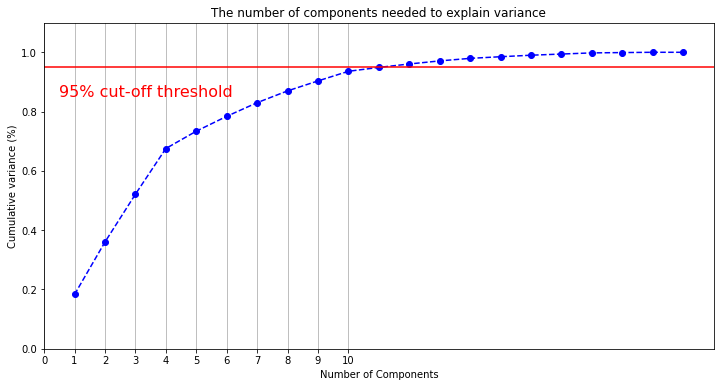

In [ ]:
pca = PCA().fit(X_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 10)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(solver="liblinear",penalty='l2',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [ ]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 269  421]
 [ 126 1883]]


In [ ]:
classifier.score(X_train,y_train)

0.7676056338028169

In [ ]:
classifier.score(X_test,y_test)

0.797332345313079

In [ ]:

#1) SVM LinearLocator ( SCALING)
#2) LOGISTIC POLYNOMIAL var
#3) NAIVE BAYES
#4) 
